In [1]:
!pip install pytesseract opencv-python matplotlib

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 1.1 MB/s eta 0:00:35
    --------------------------------------- 0.8/39.5 MB 958.5 kB/s eta 0:00:41
    --------------------------------------- 0.8/39.5 MB 958.5 kB/s eta 0:00:41
    --------------------------------------- 0.8/39.5 MB 958.5 kB/s eta 0:00:41
   - -------------------------------------- 1.0/39.5 MB 718.9 kB/s eta 0:00:54
   - -------------------------------------- 1.0/39.5 MB 718.9 kB/s eta 0:00:54
   - -------------------------------------- 1.0/39.5 MB 718.9 kB/s eta 0:00:54
   - -------------------------------------- 1.3/39.5 MB 559.2 kB/s eta 0:01:09
   - -------------------------------------- 1.6/39.5 MB 630.5 kB/s eta 0:01:01
 

In [30]:
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
pytesseract.pytesseract.tesseract_cmd = r"D:\Tesseract-OCR\tesseract.exe" 

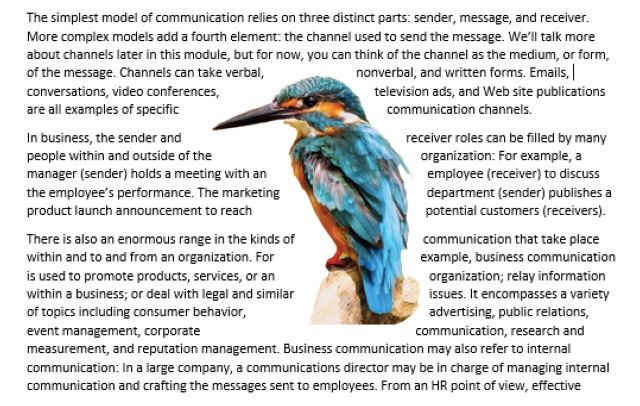

In [83]:
# Load the image
image_path = r"C:\Users\LENOVO\Desktop\Test-Image.png"
image = cv2.imread(image_path)

# Convert from BGR to RGB (for correct display)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


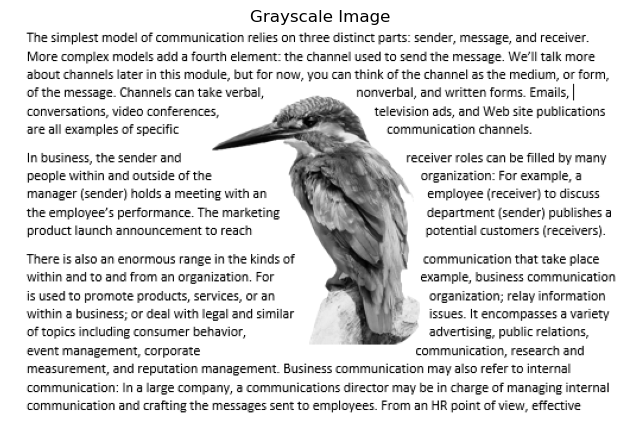

In [85]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display grayscale image
plt.figure(figsize=(8, 6))
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()


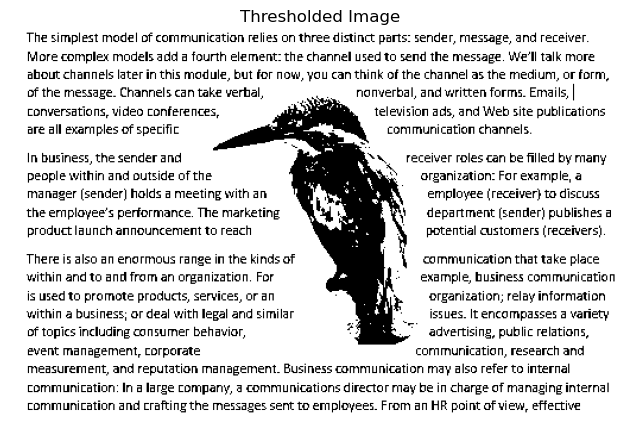

In [87]:
# Apply binary thresholding
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Display thresholded image
plt.figure(figsize=(8, 6))
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.title("Thresholded Image")
plt.show()


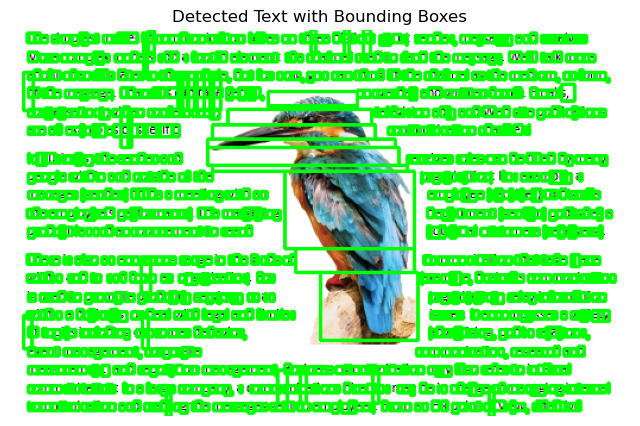

In [89]:
# Get bounding box data
h, w, _ = image.shape
boxes = pytesseract.image_to_boxes(image)

# Draw bounding boxes
for b in boxes.splitlines():
    b = b.split()
    x, y, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    y, y2 = h - y, h - y2  # Flip y-axis for OpenCV
    
    cv2.rectangle(image_rgb, (x, y2), (x2, y), (0, 255, 0), 2)

# Display the image with bounding boxes
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Detected Text with Bounding Boxes")
plt.show()


In [90]:
# Get detailed OCR data
ocr_data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

# Print extracted words and confidence scores
for word, conf in zip(ocr_data["text"], ocr_data["conf"]):
    if word.strip():
        print(f"Word: {word} - Confidence: {conf}%")


Word: ‘The - Confidence: 89%
Word: simplest - Confidence: 96%
Word: model - Confidence: 94%
Word: of - Confidence: 96%
Word: communication - Confidence: 96%
Word: relies - Confidence: 93%
Word: on - Confidence: 96%
Word: three - Confidence: 94%
Word: distinct - Confidence: 96%
Word: parts: - Confidence: 96%
Word: sender, - Confidence: 96%
Word: message, - Confidence: 96%
Word: and - Confidence: 96%
Word: receiver. - Confidence: 96%
Word: More - Confidence: 57%
Word: complex - Confidence: 82%
Word: models - Confidence: 55%
Word: acl - Confidence: 55%
Word: a - Confidence: 60%
Word: fourth - Confidence: 60%
Word: element - Confidence: 70%
Word: the - Confidence: 76%
Word: channel - Confidence: 68%
Word: used - Confidence: 68%
Word: to - Confidence: 82%
Word: send - Confidence: 44%
Word: the - Confidence: 44%
Word: message. - Confidence: 91%
Word: We'l - Confidence: 63%
Word: tak - Confidence: 47%
Word: more - Confidence: 47%
Word: about - Confidence: 89%
Word: channels - Confidence: 11%


In [91]:
# Extract text using Tesseract OCR
extracted_text = pytesseract.image_to_string(thresh)

# Print extracted text
print("Extracted Text:\n")
print(extracted_text)


Extracted Text:

‘The simplest model of communication relies on three distinct parts: sender, message, and receiver.
More complex models act fourth element the channel used t send the message. We'l tak more
about channels ater inthis medule, but for now, YoU can think of the channel asthe medium, or form,
of the message. Channels can take verbal, ronveral, and written forms. Email
conversations, vdeo conferences, television ads, andWeb site publications
are all exarples af speci communication channels

In business, the sender and
people within and outside of the
manager (sender) holds a meeting with an
the ernplayee’s performance. The marketing
product launch announcement to reach

1S.,__recelver roles can be filled by many
‘organization: Far example, a
employee (receiver) to discuss
department (sender) publishes a
potential customers (receivers)

There is alsa an enormous range in the kinds of
within and to and from an organization, For

is used to promote products, services, or an
wi